In [1]:
import json
with open('converted_data.json', 'r', encoding='UTF-8') as file:
    data = json.load(file)

In [2]:
data

{'Açık Söz': [['01-07-1936',
   'https://nek.istanbul.edu.tr/ekos/GAZETE/acik soz/acik soz_1936/acik soz_1936_temmuz_/acik soz_1936_temmuz_1_.pdf'],
  ['02-07-1936',
   'https://nek.istanbul.edu.tr/ekos/GAZETE/acik soz/acik soz_1936/acik soz_1936_temmuz_/acik soz_1936_temmuz_2_.pdf'],
  ['03-07-1936',
   'https://nek.istanbul.edu.tr/ekos/GAZETE/acik soz/acik soz_1936/acik soz_1936_temmuz_/acik soz_1936_temmuz_3_.pdf'],
  ['04-07-1936',
   'https://nek.istanbul.edu.tr/ekos/GAZETE/acik soz/acik soz_1936/acik soz_1936_temmuz_/acik soz_1936_temmuz_4_.pdf'],
  ['05-07-1936',
   'https://nek.istanbul.edu.tr/ekos/GAZETE/acik soz/acik soz_1936/acik soz_1936_temmuz_/acik soz_1936_temmuz_5_.pdf'],
  ['06-07-1936',
   'https://nek.istanbul.edu.tr/ekos/GAZETE/acik soz/acik soz_1936/acik soz_1936_temmuz_/acik soz_1936_temmuz_6_.pdf'],
  ['07-07-1936',
   'https://nek.istanbul.edu.tr/ekos/GAZETE/acik soz/acik soz_1936/acik soz_1936_temmuz_/acik soz_1936_temmuz_7_.pdf'],
  ['08-07-1936',
   'https://

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

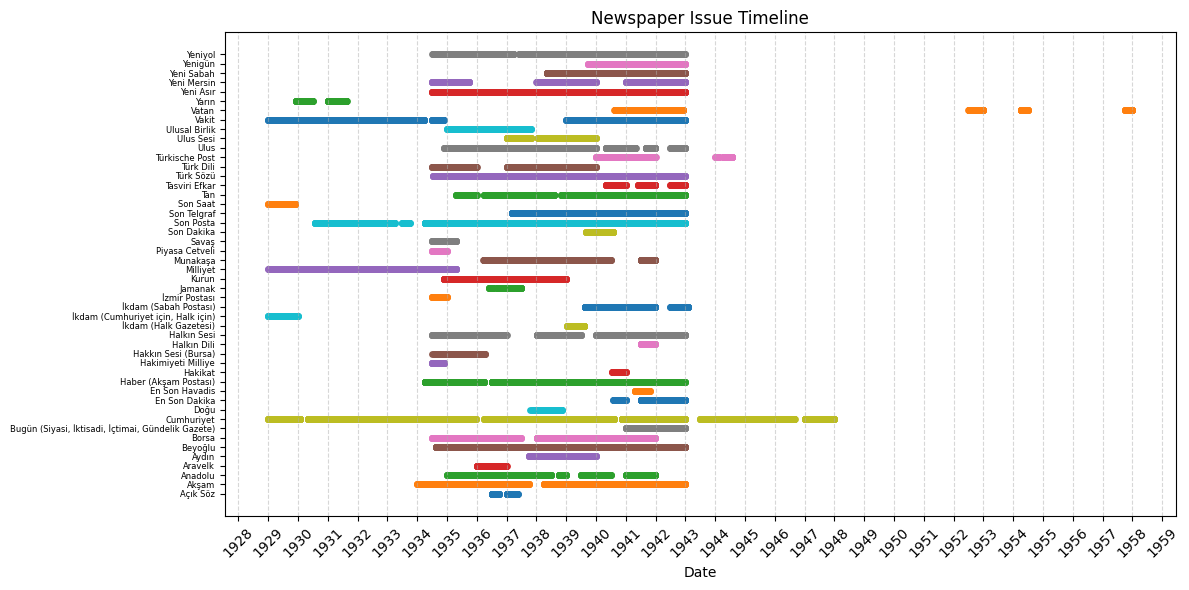

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))  # Make it tall for many labels
y_labels = list(data.keys())
y_positions = range(len(y_labels))

for i, (newspaper, issues) in enumerate(data.items()):
    dates = []
    for issue in issues:
        date_obj = parse_date_safe(issue[0])
        if date_obj:
            dates.append(date_obj)
    ax.scatter(dates, [i] * len(dates), s=15)

# Set Y-axis
ax.set_yticks(y_positions)
ax.set_yticklabels(y_labels, fontsize=6)  # Smaller font here

# X-axis and style
ax.set_xlabel("Date")
ax.set_title("Newspaper Issue Timeline")
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


In [ ]:
import pandas as pd

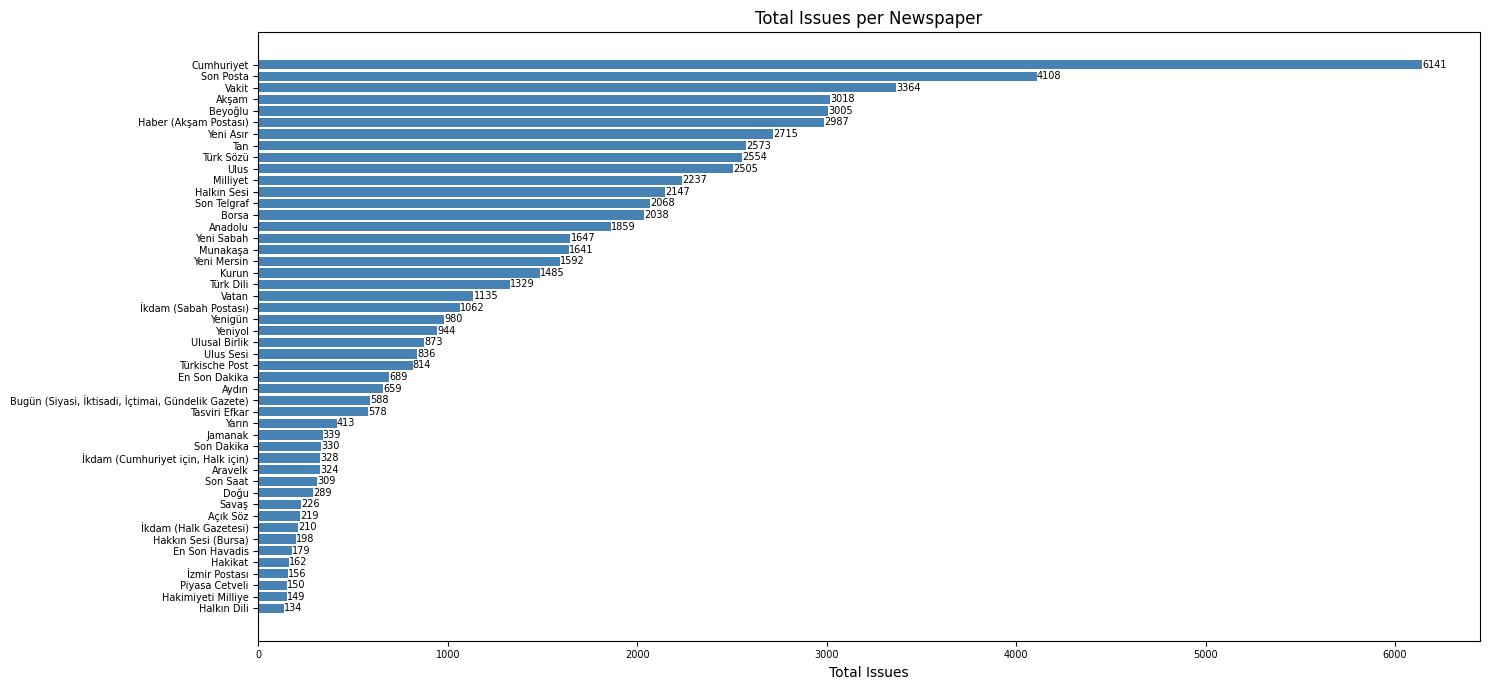

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Count issues
issue_counts = {name: len(issues) for name, issues in data.items()}

# Create DataFrame
df_counts = pd.DataFrame(issue_counts.items(), columns=['Newspaper', 'Issue Count'])
df_counts = df_counts.sort_values(by='Issue Count', ascending=True)

# Plot
plt.figure(figsize=(15, 7))
bars = plt.barh(df_counts['Newspaper'], df_counts['Issue Count'], color='steelblue')
plt.xlabel("Total Issues", fontsize=10)
plt.title("Total Issues per Newspaper", fontsize=12)
plt.yticks(fontsize=7)  
plt.xticks(fontsize=7)
plt.tight_layout()

# Add numbers to bars with smaller font
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1,
             bar.get_y() + bar.get_height()/2,
             str(int(width)),
             va='center',
             fontsize=7)  # 👈 Small number labels

# Save and show
plt.savefig("portfolio_newspaper_bar_chart_annotated.png", dpi=300)
plt.show()
